In [ ]:
import pandas as pd
df = pd.read_csv("spam_ham_dataset.csv")
df = df.drop(columns=["Unnamed: 0", "label_num"])
print(df.head())

  label                                               text
0   ham  Subject: enron methanol ; meter # : 988291\r\n...
1   ham  Subject: hpl nom for january 9 , 2001\r\n( see...
2   ham  Subject: neon retreat\r\nho ho ho , we ' re ar...
3  spam  Subject: photoshop , windows , office . cheap ...
4   ham  Subject: re : indian springs\r\nthis deal is t...


In [2]:
df = df.rename(columns={
    "text": "email_text",
    "label": "category"
})

print(df.columns)


Index(['category', 'email_text'], dtype='object')


In [3]:
def map_category(text, label):
    text = text.lower()

    if label == "spam":
        return "Spam"
    elif any(word in text for word in ["offer", "sale", "discount", "free", "deal"]):
        return "Promotions"
    elif any(word in text for word in ["help", "issue", "problem", "support", "error", "account"]):
        return "Support"
    else:
        return "Personal"

df["category"] = df.apply(
    lambda row: map_category(row["email_text"], row["category"]),
    axis=1
)

print(df["category"].value_counts())


category
Personal      1921
Spam          1499
Promotions    1376
Support        375
Name: count, dtype: int64


In [4]:
df.to_csv("final_email_dataset.csv", index=False)


In [7]:
pip install nltk


  Obtaining dependency information for nltk from https://files.pythonhosted.org/packages/60/90/81ac364ef94209c100e12579629dc92bf7a709a84af32f8c551b02c07e94/nltk-3.9.2-py3-none-any.whl.metadata
  Obtaining dependency information for regex>=2021.8.3 from https://files.pythonhosted.org/packages/0f/19/772cf8b5fc803f5c89ba85d8b1870a1ca580dc482aa030383a9289c82e44/regex-2026.1.15-cp311-cp311-win_amd64.whl.metadata
     ---------------------------------------- 0.0/41.5 kB ? eta -:--:--
     ---------------------------------------- 0.0/41.5 kB ? eta -:--:--
     ------------------- -------------------- 20.5/41.5 kB ? eta -:--:--
     -------------------------------------  41.0/41.5 kB 393.8 kB/s eta 0:00:01
     -------------------------------------- 41.5/41.5 kB 336.4 kB/s eta 0:00:00
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
    --------------------------------------- 0.0/1.5 MB ? eta -:--:--
   - -------------------------------------- 0.1/1.5 MB 1.3 MB/s eta 0:00:0


[notice] A new release of pip is available: 23.2.1 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [8]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')

# load final dataset
df = pd.read_csv("final_email_dataset.csv")

stop_words = set(stopwords.words("english"))

def clean_text(text):
    text = text.lower()
    text = re.sub(r"[^a-z\s]", "", text)   # remove punctuation & numbers
    words = text.split()
    words = [word for word in words if word not in stop_words]
    return " ".join(words)

# apply preprocessing
df["clean_text"] = df["email_text"].apply(clean_text)

print(df[["email_text", "clean_text"]].head())


[nltk_data] Downloading package stopwords to C:\Users\Sanmitraa V
[nltk_data]     R\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


                                          email_text  \
0  Subject: enron methanol ; meter # : 988291\r\n...   
1  Subject: hpl nom for january 9 , 2001\r\n( see...   
2  Subject: neon retreat\r\nho ho ho , we ' re ar...   
3  Subject: photoshop , windows , office . cheap ...   
4  Subject: re : indian springs\r\nthis deal is t...   

                                          clean_text  
0  subject enron methanol meter follow note gave ...  
1  subject hpl nom january see attached file hpln...  
2  subject neon retreat ho ho ho around wonderful...  
3  subject photoshop windows office cheap main tr...  
4  subject indian springs deal book teco pvr reve...  


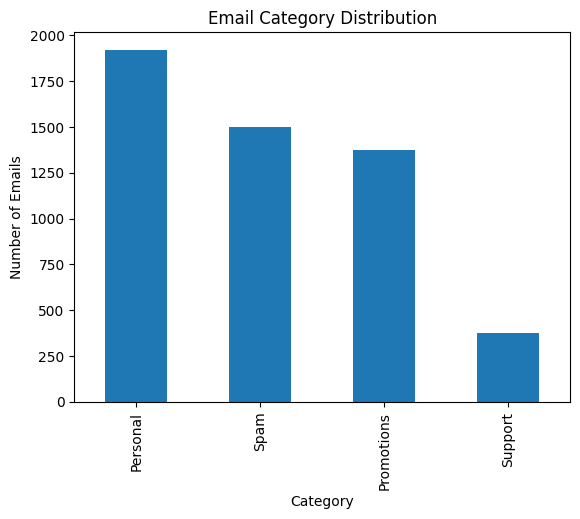

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("final_email_dataset.csv")

plt.figure()
df["category"].value_counts().plot(kind="bar")
plt.title("Email Category Distribution")
plt.xlabel("Category")
plt.ylabel("Number of Emails")
plt.show()


In [12]:
import re
import nltk
from nltk.corpus import stopwords

nltk.download("stopwords")

stop_words = set(stopwords.words("english"))

def clean_text(text):
    text = text.lower()
    text = re.sub(r"[^a-z\s]", "", text)
    words = text.split()
    words = [w for w in words if w not in stop_words]
    return " ".join(words)

df["clean_text"] = df["email_text"].apply(clean_text)


[nltk_data] Downloading package stopwords to C:\Users\Sanmitraa V
[nltk_data]     R\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


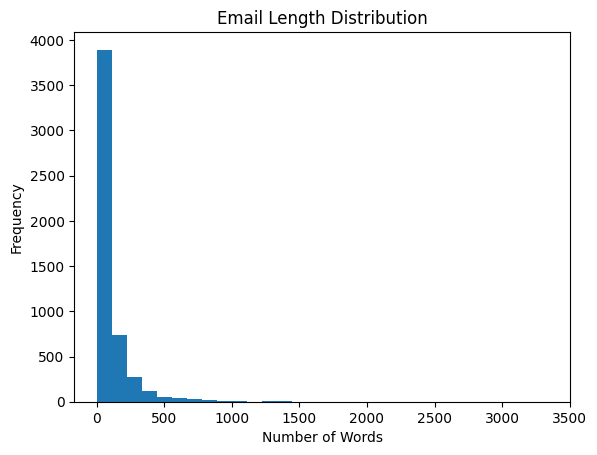

In [13]:
df["text_length"] = df["clean_text"].apply(lambda x: len(x.split()))

import matplotlib.pyplot as plt

plt.figure()
plt.hist(df["text_length"], bins=30)
plt.title("Email Length Distribution")
plt.xlabel("Number of Words")
plt.ylabel("Frequency")
plt.show()


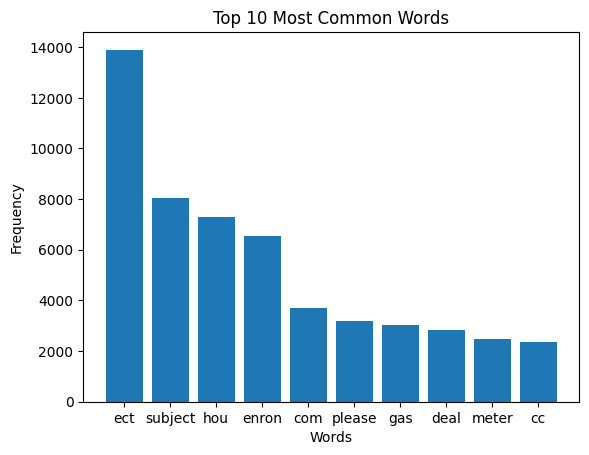

In [14]:
from collections import Counter

all_words = " ".join(df["clean_text"]).split()
common_words = Counter(all_words).most_common(10)

words, counts = zip(*common_words)

plt.figure()
plt.bar(words, counts)
plt.title("Top 10 Most Common Words")
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.show()


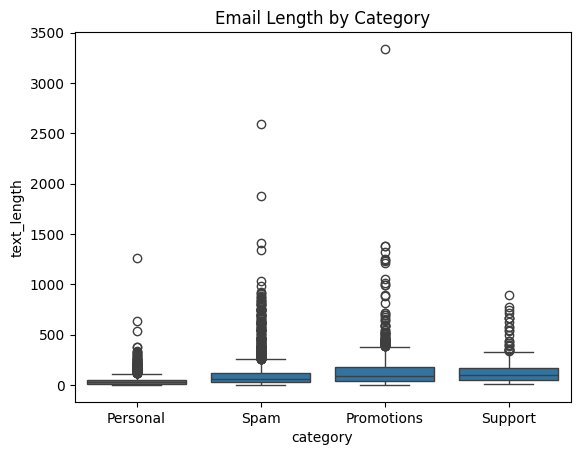

In [15]:
import seaborn as sns

plt.figure()
sns.boxplot(x="category", y="text_length", data=df)
plt.title("Email Length by Category")
plt.show()
